<a href="https://colab.research.google.com/github/keonju2/2022_DL_project/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D_8%ED%8C%80_%EB%B0%9C%ED%91%9C%EC%9E%90%EB%A3%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 목차

1. 프로젝트 배경
2. 데이터 설명
3. 모델 및 하이퍼파라미터 선정
4. 결과 분석
5. 최종 결과
6. 한계점 및 보완점
7. 디버깅 및 Git
8. Rererence

# 프로젝트 배경


* 미국자동차공학회(SAE)에 따르면, 자율주행 기술 단계는 운전자 또는 시스템의 개입정도에 따라 총 6단계로 나뉜다.
  * 0~2단계 : 운전자가 운전을 하고, 주변을 살펴 각종 상황에 대응한다. 보조를 할 수는 있지만 통제의 주체는 사람이다. 현재 대부분의 자동차가 여기에 속한다.
  * 3~5단계 : 운전자 대신 시스템이 스스로 운전과 돌바 상황에 대한 대처를 수행하며, 보통 3단계부터 자율주행차라고 평가한다. 

* 현재 자율주행시스템에 관한 많은 연구가 진행되고 있고, 자율주행을 하기 위한 핵심 기술은 **영상처리** 및 **인식기술**이다.

* 자율주행차량은 아래와 같은 기술을 융합 혹은 복합 사용하여 자율주행을 위한 **객체 인식**에 이용하고 있다.
  * 센서
    * LiDAR : **광신호**를 일정한 방식으로 조사한 후 장애물 등에서 반사되어 되돌아오는 광 에너지를 분석하여 차량 주변의 **3차원 공간정보를 획득하는 장치**로서 전통적인 차량용 센서인 비전 센서 및 레이더 센서와 함께 자율주행을 지원하는 핵심 센서다. 
    * RADAR :  **전자기파**를 송출하여 물체에 부딪쳐서 반사하는 신호를 해석, 목표물의 거리와 각도, 속도 등의 정보를 만들어낸다.
  * 초음파
    * 음파를 쏘아 돌아오는 반사파를 계산하여 위치를 파악하기 위해 사용한다.
    * 근접거리에서 사물의 위치를 측정하기에 적합
  * **카메라**
    * 차선을 인식하고 주변 사물 형태와 색상을 인식하기 위해 사용된다. 해상도가 높은 정보를 제공하므로 자율주행차량의 객체인식을 위한 핵심
    * 카메라를 이용한 영상인식기술이 자율주행 차량에 적용되기 위해서 중요한 두 가지는 **속도**와 **정확도**


  <img width="400" src = "https://www.kama.or.kr/jsp/webzine/201805/images/img_report01_01.jpg">

## Motivation for the project

* 딥러닝 기반의 객체인식(Object Detection)기술을 사용하여 실제 도로 주행 환경에서 어느정도의 성능을 보일 수 있는지 확인 해본다.

* 실주행 환경에서 사용되기 위해 앞으로 어떤 부분들이 개선 및 보완되어야 할지 확인 해본다.

# 데이터 설명

* Data : AIHub의 '**도로주행영상 소개**' 데이터 
  https://aihub.or.kr/aidata/8007

  * XML 파일에 BoundingBox, Spline, Polygon 정보 제공  
  * Object Detection을 목표로 하였기에 **BoundingBox**만 사용  
  <img width="400" src = "https://aihub.or.kr/sites/default/files/2020-09/%EB%8C%80%ED%91%9C%EB%8F%84%EB%A9%B4_4.PNG">  



* label:  총 34 종류로 배경, 자동차, 차선, 신호등, 표지판과 같은 데이터로 구성  

  <img  width="400" src = "https://keonju2.notion.site/image/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2F8b038676-4274-4d77-b390-80213f26bc02%2FUntitled.png?table=block&id=71c06ba1-038b-45ec-9281-5373b1c9e22f&spaceId=8a58a389-d9fc-4b41-a938-1224060350a1&width=1160&userId=&cache=v2">
  <img  width="400" src = "https://keonju2.notion.site/image/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2Fb2a0ce68-52ea-42f4-8d8d-84467c46e8a1%2FUntitled.png?table=block&id=703af554-608c-424d-bbb5-91f9797d068c&spaceId=8a58a389-d9fc-4b41-a938-1224060350a1&width=1150&userId=&cache=v2">



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from zipfile import ZipFile # 압축 푸는 함수
import os

def unzip(source_file, dest_path):
    with ZipFile(source_file, 'r') as zf:
        zipInfo = zf.infolist()
        for member in zipInfo:
            try:
                member.filename = member.filename.encode('cp437').decode('euc-kr', 'ignore')
                zf.extract(member, dest_path)
            except:
                raise Exception('what?!')

In [ ]:
file_names = '/content/gdrive/MyDrive/DLP/Dataset/bb.zip' # train 도심로 데이터 압축 풀기
unzip(file_names,'/content')

In [ ]:
file_names = '/content/gdrive/MyDrive/DLP/Dataset/labels.zip' # train 자동차 전용도로 데이터 압축풀기
unzip(file_names,'/content')

In [ ]:
import os
import xml.etree.ElementTree as ET

# 데이터 라벨 정보 저장 및 도심로 데이터 개수 세기

label={'Vehicle_Car':0, 'Vehicle_Bus' : 1, 'Vehicle_Motorcycle' : 2, 'Vehicle_Unknown' : 3,
       'Pedestrian_Pedestrian' :4, 'Pedestrian_Bicycle' : 5,'Lane_White_Dash' : 6, 'Lane_White_Solid' : 7,
       'Lane_Yellow_Dash' : 8, 'Lane_Yellow_Solid' : 9, 'Lane_Blue_Dash' : 10, 'Lane_Blue_Solid' : 11,

       'TrafficLight_Red' : 12, 'TrafficLight_Yellow' : 13, 'TrafficLight_Green' : 14, 'TrafficLight_Arrow' : 15,
       'TrafficLight_RedArrow' : 16, 'TrafficLight_YellowArrow' : 17, 'TrafficLight_GreenArrow' : 18,
       'TrafficSign_Speed' : 19, 'TrafficSign_Else' : 20,

       'RoadMark_StopLine' : 21, 'RoadMark_Crosswalk' : 22,
       'RoadMark_Number' : 23, 'RoadMark_Character' : 24, 'RoadMarkArrow_Straight' : 25, 'RoadMarkArrow_Left' : 26,
       'RoadMarkArrow_Right' : 27, 'RoadMarkArrow_StraightLeft' : 28, 'RoadMarkArrow_StraightRight' : 29,
       'RoadMarkArrow_Uturn' : 30, 'RoadMarkArrow_Else' : 31}

label_count_1 =[0]*32



for (path, dir, files) in os.walk('/content/bb'):
    for filename in files:
        ext = os.path.splitext(filename)
        total_file_name = path.replace('\\','/')+'/'+filename
        if ext[1] == '.txt':
            f = open(total_file_name,'r')
            text = f.readlines()
            for i in text:
              label_check = i.split(' ')[0]
              label_count_1[int(label_check)] += 1
            f.close()


print(label_count_1)

[40739, 3948, 1266, 15272, 5416, 261, 0, 0, 0, 0, 0, 0, 1056, 114, 1701, 1, 88, 0, 222, 1003, 3429, 915, 760, 438, 2065, 1423, 221, 281, 51, 119, 20, 1696]


In [ ]:
label_count =[0]*32

# 자동차 전용도로 라벨 개수 세기

for (path, dir, files) in os.walk('/content/labels'):
    for filename in files:
        ext = os.path.splitext(filename)
        total_file_name = path.replace('\\','/')+'/'+filename
        if ext[1] == '.txt':
            f = open(total_file_name,'r')
            text = f.readlines()
            for i in text:
              label_check = i.split(' ')[0]
              label_count[int(label_check)] += 1
            f.close()


print(label_count)

[687438, 70668, 8092, 283066, 59143, 4528, 0, 0, 0, 0, 0, 0, 22846, 2187, 31895, 283, 2776, 23, 4604, 15571, 49568, 22073, 19064, 7239, 31063, 20693, 4149, 4284, 1345, 2052, 1215, 25557]


In [ ]:
import pandas as pd

# label 개수 비교

data = pd.DataFrame(data =[label_count_1,label_count],columns = label.keys(), index=['도심로','자동차전용도로'])
data.transpose()

,도심로,자동차전용도로
Vehicle_Car,40739,687438
Vehicle_Bus,3948,70668
Vehicle_Motorcycle,1266,8092
Vehicle_Unknown,15272,283066
Pedestrian_Pedestrian,5416,59143
Pedestrian_Bicycle,261,4528
Lane_White_Dash,0,0
Lane_White_Solid,0,0
Lane_Yellow_Dash,0,0
Lane_Yellow_Solid,0,0


In [ ]:
# label 비율 비교

data.transpose()/data.sum(axis=1)

,도심로,자동차전용도로
Vehicle_Car,0.493776,0.497631
Vehicle_Bus,0.047852,0.051156
Vehicle_Motorcycle,0.015345,0.005858
Vehicle_Unknown,0.185104,0.204909
Pedestrian_Pedestrian,0.065645,0.042813
Pedestrian_Bicycle,0.003163,0.003278
Lane_White_Dash,0.000000,0.000000
Lane_White_Solid,0.000000,0.000000
Lane_Yellow_Dash,0.000000,0.000000
Lane_Yellow_Solid,0.000000,0.000000


# 모델 선정  

## One Stage Detection VS Two Stage Detection  
* Two Stage Detection

  * Two Stage Detection은 객체의 위치를 찾는 Region Proposal과 분류를 진행하는 Region Classification으로 구성  
  
* One Stage Detection

  * One Stage Detection은 Region Proposal과 Classification을 동시에 하는 방법
  * 기존 Two Stage Detector이 정확도 측면에서는 우수하지만 속도(FPS) 측면에서 느리다는 단점을 보완

  <img width="400" src = "https://keonju2.notion.site/image/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2F4ecb63f1-5b86-4e03-94fe-bd1baf6c2f00%2FUntitled.png?table=block&id=85b80aec-cb04-4b58-8b96-fa5cc106a132&spaceId=8a58a389-d9fc-4b41-a938-1224060350a1&width=2000&userId=&cache=v2">
  
<img width="400" alt="스크린샷 2022-04-24 오전 12 03 22" src="https://user-images.githubusercontent.com/54880474/171030355-8bcd2823-cd56-4aaf-86a0-14cc0c464e80.png">


 <img width="400" alt="스크린샷 2022-04-24 오전 12 06 13" src="https://user-images.githubusercontent.com/54880474/171030256-eb4abc2b-bead-4522-8b21-89e7c2cfd584.png">

  ![20220531_012103](https://user-images.githubusercontent.com/54880474/171031038-dea27c89-65aa-4562-a522-763851950184.png)   
 [논문](https://www.irjet.net/archives/V8/i7/IRJET-V8I7193.pdf)에 따르면 Yolov5s가 real-time 객체 감지에서 가장 optimal한 모델이라고 합니다.  
 따라서 Yolov5에서 다양한 모델을 시도해보았습니다.  






In [ ]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
!pip install -r requirements.txt  # install
!pip install -q roboflow

import torch
from IPython.display import Image  # for displaying images
import os 
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")


Cloning into 'yolov5'...
remote: Enumerating objects: 13476, done.
remote: Total 13476 (delta 0), reused 0 (delta 0), pack-reused 13476
Receiving objects: 100% (13476/13476), 12.11 MiB | 26.16 MiB/s, done.
Resolving deltas: 100% (9403/9403), done.
/content/yolov5
     |████████████████████████████████| 596 kB 9.6 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 145 kB 7.6 MB/s 
     |████████████████████████████████| 178 kB 79.9 MB/s 
     |████████████████████████████████| 1.1 MB 78.4 MB/s 
     |████████████████████████████████| 67 kB 6.7 MB/s 
     |████████████████████████████████| 54 kB 3.3 MB/s 
     |████████████████████████████████| 138 kB 77.8 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the so

## Preprocessing Data


###  Yolov5 형식으로 Label 변환

* XML 데이터에 있는 정보를 txt파일로 변환
* 기존 이미지 데이터는 1920 X 1080 으로 제공
* Label 정보는 Xmin, Xmax, Ymin, Ymax 데이터가 제공
* Yolov5에서는 Label의 위치 좌표와 크기를 MinMaxScaler한 값을 입력
* 따라서 데이터 셋에서 제공된 X,Y 좌표와 이미지 크기 데이터를 통해 Lable 정보를 0-1사이로 변경

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

import os
import xml.etree.ElementTree as ET

label={'Vehicle_Car':0, 'Vehicle_Bus' : 1, 'Vehicle_Motorcycle' : 2, 'Vehicle_Unknown' : 3,
       'Pedestrian_Pedestrian' :4, 'Pedestrian_Bicycle' : 5,'Lane_White_Dash' : 6, 'Lane_White_Solid' : 7,
       'Lane_Yellow_Dash' : 8, 'Lane_Yellow_Solid' : 9, 'Lane_Blue_Dash' : 10, 'Lane_Blue_Solid' : 11,

       'TrafficLight_Red' : 12, 'TrafficLight_Yellow' : 13, 'TrafficLight_Green' : 14, 'TrafficLight_Arrow' : 15,
       'TrafficLight_RedArrow' : 16, 'TrafficLight_YellowArrow' : 17, 'TrafficLight_GreenArrow' : 18,
       'TrafficSign_Speed' : 19, 'TrafficSign_Else' : 20,

       'RoadMark_StopLine' : 21, 'RoadMark_Crosswalk' : 22,
       'RoadMark_Number' : 23, 'RoadMark_Character' : 24, 'RoadMarkArrow_Straight' : 25, 'RoadMarkArrow_Left' : 26,
       'RoadMarkArrow_Right' : 27, 'RoadMarkArrow_StraightLeft' : 28, 'RoadMarkArrow_StraightRight' : 29,
       'RoadMarkArrow_Uturn' : 30, 'RoadMarkArrow_Else' : 31}


for (path, dir, files) in os.walk('/content/gdrive/MyDrive/DLP/Dataset'):
    for filename in files:
        ext = os.path.splitext(filename)
        if ext[1] == '.xml':
            total_file_name = path.replace('\\','/')+'/'+filename
            new_file = total_file_name.replace('.xml','')
            f = open(new_file+'.txt','w')

            tree =ET.parse(total_file_name)
            root = tree.getroot()
            obj = root.findall("object")
            size = root.findall('size')
            for a in size:
                w = a.findtext('width')
                h = a.findtext('height')
                # print(w)

                name = [x.findtext("name") for x in obj]
                # print(name)

                bndbox = obj[0].findall("bndbox")

                for b in range(len(obj)):
                    bndbox = obj[b].findall("bndbox")
                    xmin = [x.findtext("xmin") for x in bndbox]
                    # print(xmin)
                    xmax = [x.findtext("xmax") for x in bndbox]
                    # print(xmax)
                    ymin = [y.findtext("ymin") for y in bndbox]
                    # print(ymin)
                    ymax = [y.findtext("ymax") for y in bndbox]
                    # print(ymax)
                    x_c, y_c, w1, h1 = (int(xmin[0]) / int(w) + int(xmax[0]) / int(w)) / 2, (
                                int(ymin[0]) / int(h) + int(ymax[0]) / int(h)) / 2, (abs(int(xmax[0]) - int(xmin[0]))) / int(
                        w), (abs(int(ymax[0]) - int(ymin[0]))) / int(h)
                    if name[b] in label.keys():
                        result = [str(label[name[b]]), str(x_c), str(y_c), str(w1), str(h1)]
                    else:
                        break

                    f.write(' '.join(result))
                    f.write('\n')
                f.close()
                os.remove(total_file_name)

### 이미지 데이터

* 데이터 크기
  * 도심로 데이터 : 압축 후 30GB
  * 자동차 전용도로 데이터 : 압축 후 40GB 

* Google Drive에 두 이미지 압축 파일 과 Label 압축 파일을 올려 Colab 디스크에 압축을 푸는 방식으로 학습을 진행 

<img width="600" alt="134436012-65111ad1-9541-4853-81a6-f19a3468b75f" src="https://user-images.githubusercontent.com/54880474/171034308-51f0f340-2893-400f-b7da-afe7004fd5d0.png">

In [ ]:
# 압축풀기
file_names = '/content/gdrive/MyDrive/DLP/Dataset/Training/[원천]도심로.zip'
unzip(file_names,'/content/yolov5/custom_dataset/train/images')

In [ ]:
file_names = '/content/gdrive/MyDrive/DLP/Dataset/Valid/원천데이터.zip'
unzip(file_names,'/content/yolov5/sample_data')

In [ ]:
# 경로 수정
shutil.move('/content/yolov5/sample_data/bb',
            '/content/yolov5/custom_dataset/val/images')

'/content/yolov5/custom_dataset/val/images'

In [ ]:
shutil.rmtree('/content/yolov5/sample_data')

In [ ]:
file_names = '/content/gdrive/MyDrive/DLP/Dataset/Valid/bb.zip'
unzip(file_names,'/content/yolov5/sample_data')

In [ ]:
shutil.move('/content/yolov5/sample_data/bb','/content/yolov5/custom_dataset/val/labels')

'/content/yolov5/custom_dataset/val/labels'

In [ ]:
file_names = '/content/gdrive/MyDrive/DLP/Dataset/Training/labels.zip'
unzip(file_names,'/content/yolov5/sample_data')

In [ ]:
shutil.move('/content/yolov5/sample_data/labels',
            '/content/yolov5/custom_dataset/train/labels')

'/content/yolov5/custom_dataset/train/labels'

### Train과 Valid 정보 제공

* Yolov5 모델에서 학습을 위해 yaml 파일 생성
  * train, valid 데이터 셋의 경로
  * label의 개수
  * label의 이름을 입력한 파일을 생성  

* 세부 경로에 대해서는 label과 image의 파일 구조와 이름이 같다면 모델이 학습하기 때문에 폴더명을 동일하게 변경

In [ ]:
# label 정보와 데이터 경로 지정

import yaml

make_yaml = {
             "train" : "/content/yolov5/custom_dataset/train",
             "val": "/content/yolov5/custom_dataset/val",

             "nc" : 32,
             "names": ['Vehicle_Car', 'Vehicle_Bus', 'Vehicle_Motorcycle', 'Vehicle_Unknown', 
                       'Pedestrian_Pedestrian', 'Pedestrian_Bicycle', 'Lane_White_Dash', 'Lane_White_Solid', 
                       'Lane_Yellow_Dash', 'Lane_Yellow_Solid', 'Lane_Blue_Dash', 'Lane_Blue_Solid', 
                       'TrafficLight_Red', 'TrafficLight_Yellow', 'TrafficLight_Green', 'TrafficLight_Arrow', 
                       'TrafficLight_RedArrow', 'TrafficLight_YellowArrow', 'TrafficLight_GreenArrow', 
                       'TrafficSign_Speed', 'TrafficSign_Else', 'RoadMark_StopLine', 'RoadMark_Crosswalk', 
                       'RoadMark_Number', 'RoadMark_Character', 'RoadMarkArrow_Straight', 'RoadMarkArrow_Left', 
                       'RoadMarkArrow_Right', 'RoadMarkArrow_StraightLeft', 'RoadMarkArrow_StraightRight', 
                       'RoadMarkArrow_Uturn', 'RoadMarkArrow_Else']
}
with open('/content/yolov5/data/custom_dataset.yaml', 'w') as outfile:
    yaml.dump(make_yaml, outfile, default_flow_style=False)

In [ ]:
# 폴더 이름 변경
for (root, directories, files) in os.walk('/content/yolov5/custom_dataset'):
    for file in files:
        file_path = os.path.join(root, file)
        change_file_path = file.replace('_v001_1','')
        file_path2 = os.path.join(root, change_file_path)
        os.rename(file_path,file_path2)

In [ ]:
for (root, directories, files) in os.walk('/content/yolov5/custom_dataset'):
    for file in directories:
        file_path = os.path.join(root, file)
        if 'annotations' in file_path:
          change_file_path = file_path.replace('_annotations_v001_1','')
          
          shutil.move(file_path,change_file_path)
        

## Model Train

![model_comparison](https://user-images.githubusercontent.com/54880474/171031579-a97bad0b-209b-46cf-be33-7affb0d4fc7d.png)

* Yolov5 모델의 경우 Pre-train 된 모델의 경우 image size(640, 1280)와 속도에 따라 10여개의 모델이 있습니다.

 * image size = 1280  
 <img width="400" src = "https://user-images.githubusercontent.com/26833433/155040763-93c22a27-347c-4e3c-847a-8094621d3f4e.png"> 

 * image size = 640  
 <img width="400" src = "https://user-images.githubusercontent.com/26833433/155040757-ce0934a3-06a6-43dc-a979-2edbbd69ea0e.png">

* 모델 정확도가 늘어날수록 GPU 용량이 커 Batch Size를 줄이지 않는다면 Colab 환경에서 학습이 불가능, 학습 시간이 매우 크게 증가  

* 따라서 Yolov5n을 제외한 8개의 Pre-train 모델을 Batch size를 변경해가며 학습 가능한 모델을 선정하였습니다.  

* 또한 Pre-train하지 않은 모델 또한 8개의 모델을 시도해보았습니다.  
  
    
Pre-Trained  
모델 : yolov5x, batch size : 64, image size : 640, out of memory  
모델 : yolov5l, batch size : 64, image size : 640, out of memory   
모델 : yolov5m, batch size : 64, image size : 640, out of memory  
모델 : yolov5s6, batch size : 64, image size : 1280, out of memory  
모델 : yolov5s6, batch size : 32, image size : 1280, out of memory  
모델 : yolov5s6, batch size : 16, image size : 1280, success  
모델 : yolov5x6, batch size : 32, image size : 640, out of memory  
모델 : yolov5m, batch size : 32, image size : 640, success  
  
Not Pre-Trained  
모델 : yolov5x, batch size : 64, image size : 640, out of memory  
모델 : yolov5l, batch size : 64, image size : 640, out of memory  
모델 : yolov5m, batch size : 64, image size : 640, out of memory  
모델 : yolov5s6, batch size : 64, image size : 1280, out of memory  
모델 : yolov5s6, batch size : 32, image size : 1280, out of memory  
모델 : yolov5s, batch size : 64, image size : 640, success  
모델 : yolov5x, batch size : 32, image size : 640, out of memory  
모델 : yolov5m, batch size : 32, image size : 640, success  
  


### Pre-Train 모델

* model = yolov5m
* image size = 640
* batch size = 32

In [ ]:
!python train.py --img 640 --batch 32 --epochs 5 --data /content/yolov5/data/custom_dataset.yaml --weights yolov5m.pt      

train: weights=yolov5m.pt, cfg=, data=/content/yolov5/data/custom_dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=5, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-234-gd490bdd Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv

In [ ]:
# 모델 결과 저장

save_path = '/content/gdrive/MyDrive/DLP/result/효준/'
save_file_path = '/content/yolov5/runs/train/'

shutil.move(save_file_path, save_path)

'/content/gdrive/MyDrive/DLP/result/효준/train'

### Not Pre-Train 모델

* model = yolov5m
* image size = 640
* batch size = 32

In [ ]:
!python train.py --img 640 --cfg yolov5m.yaml  --batch 32 --epochs 5 --data /content/yolov5/data/custom_dataset.yaml --weights '' 

train: weights=, cfg=yolov5s.yaml, data=/content/yolov5/data/custom_dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=5, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-234-gd490bdd Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, h

In [ ]:
save_path = '/content/gdrive/MyDrive/DLP/result/제우'
save_file_path = '/content/yolov5/runs/train'

shutil.move(save_file_path, save_path)

'/content/gdrive/MyDrive/DLP/result/제우/train'

### Pre-Train model vs Not Pre- Train model

 * Pre-Train model
 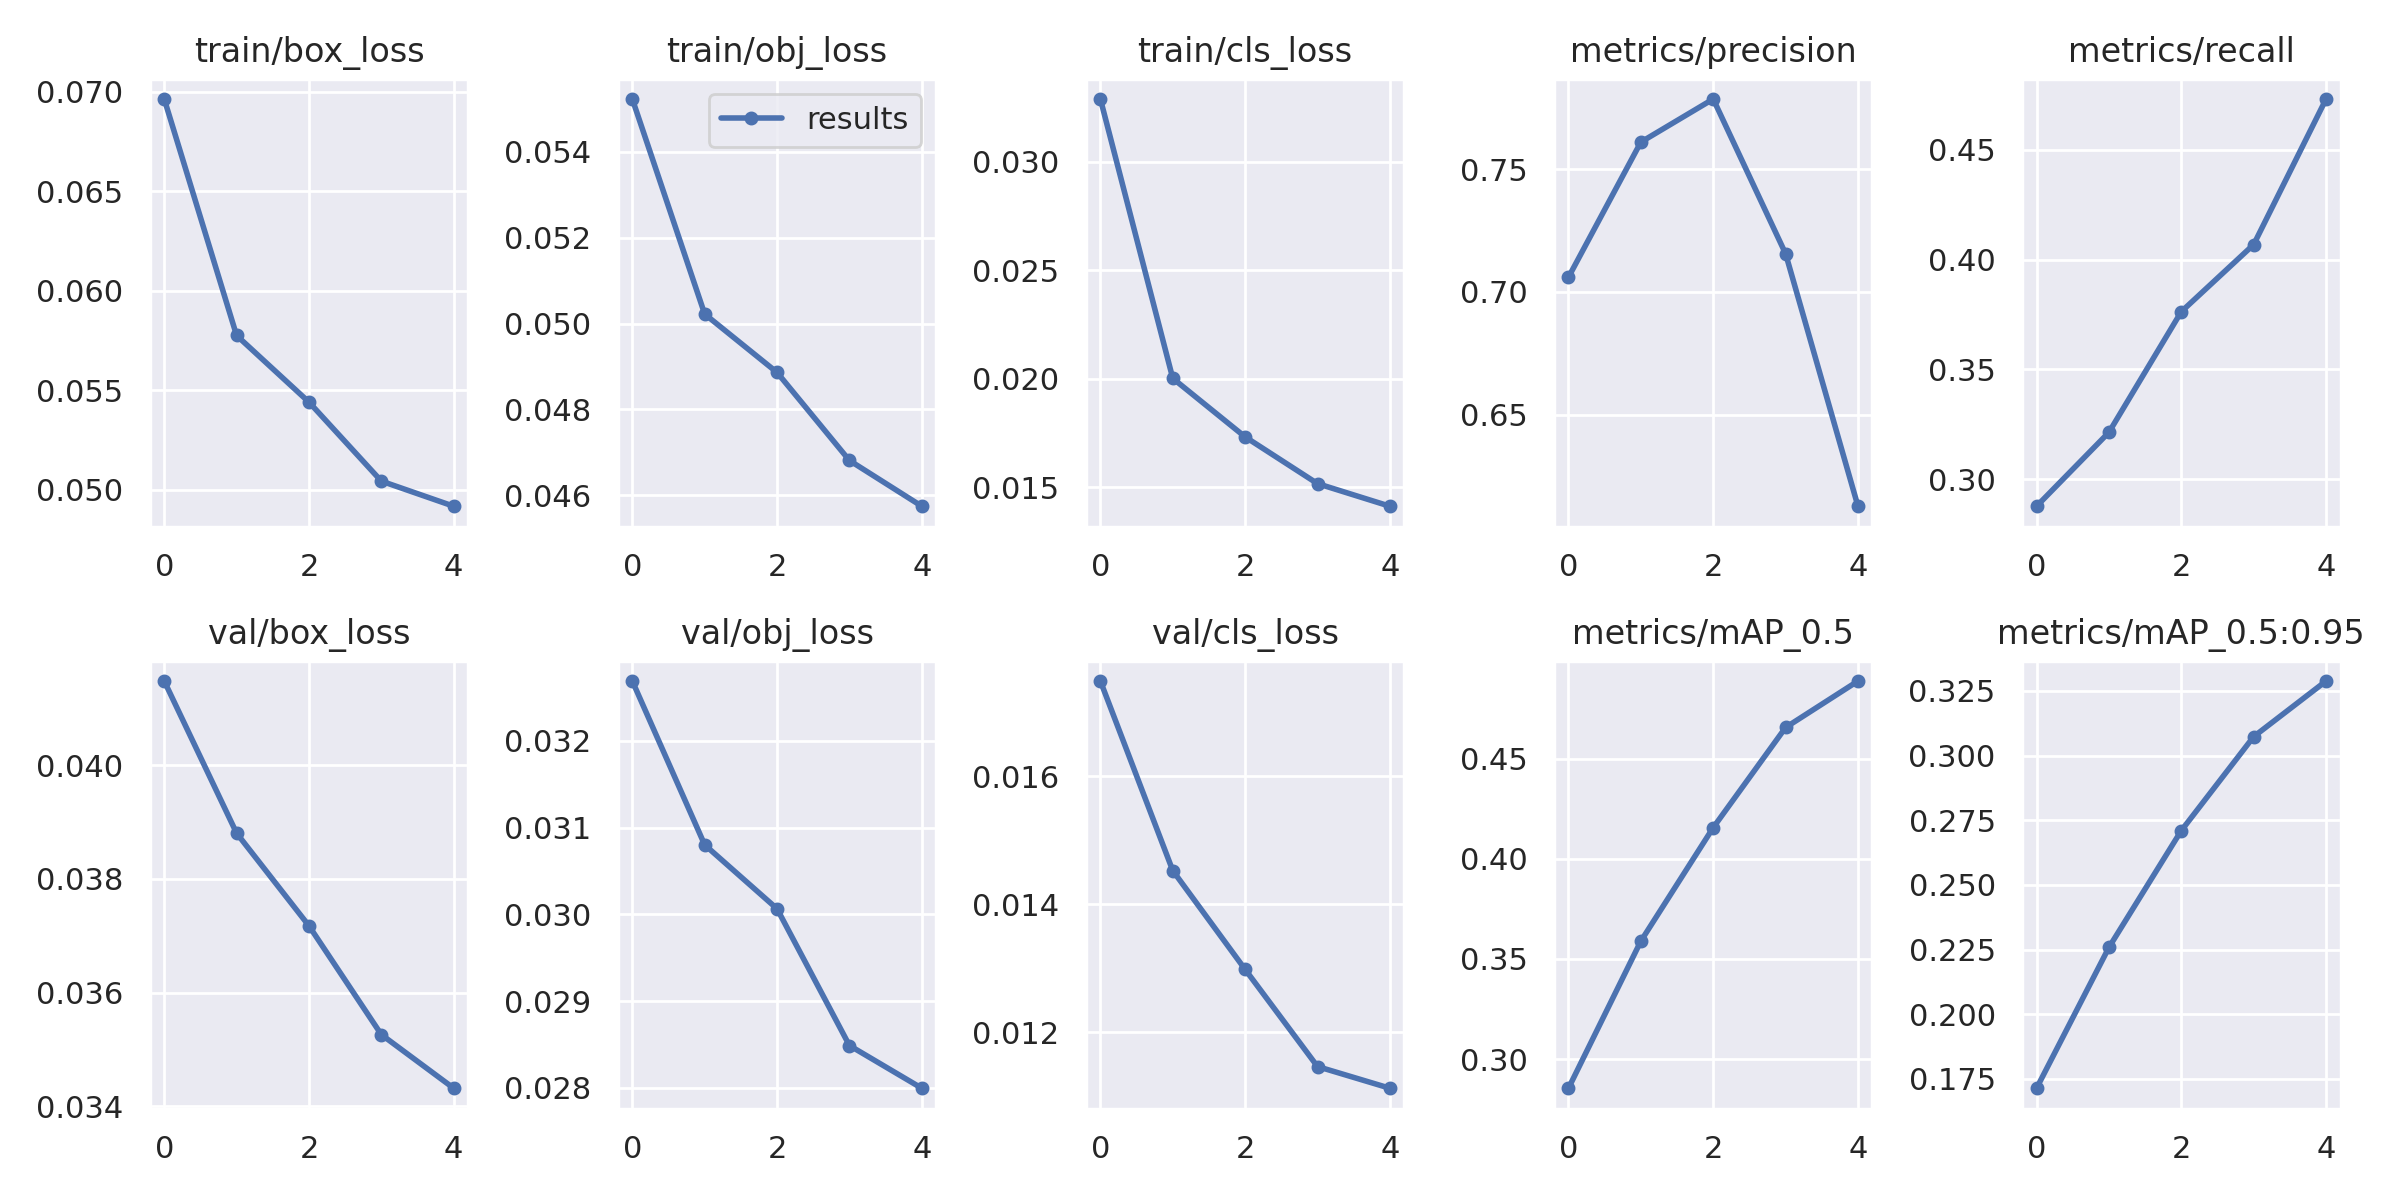

 * Not Pre-Train model
 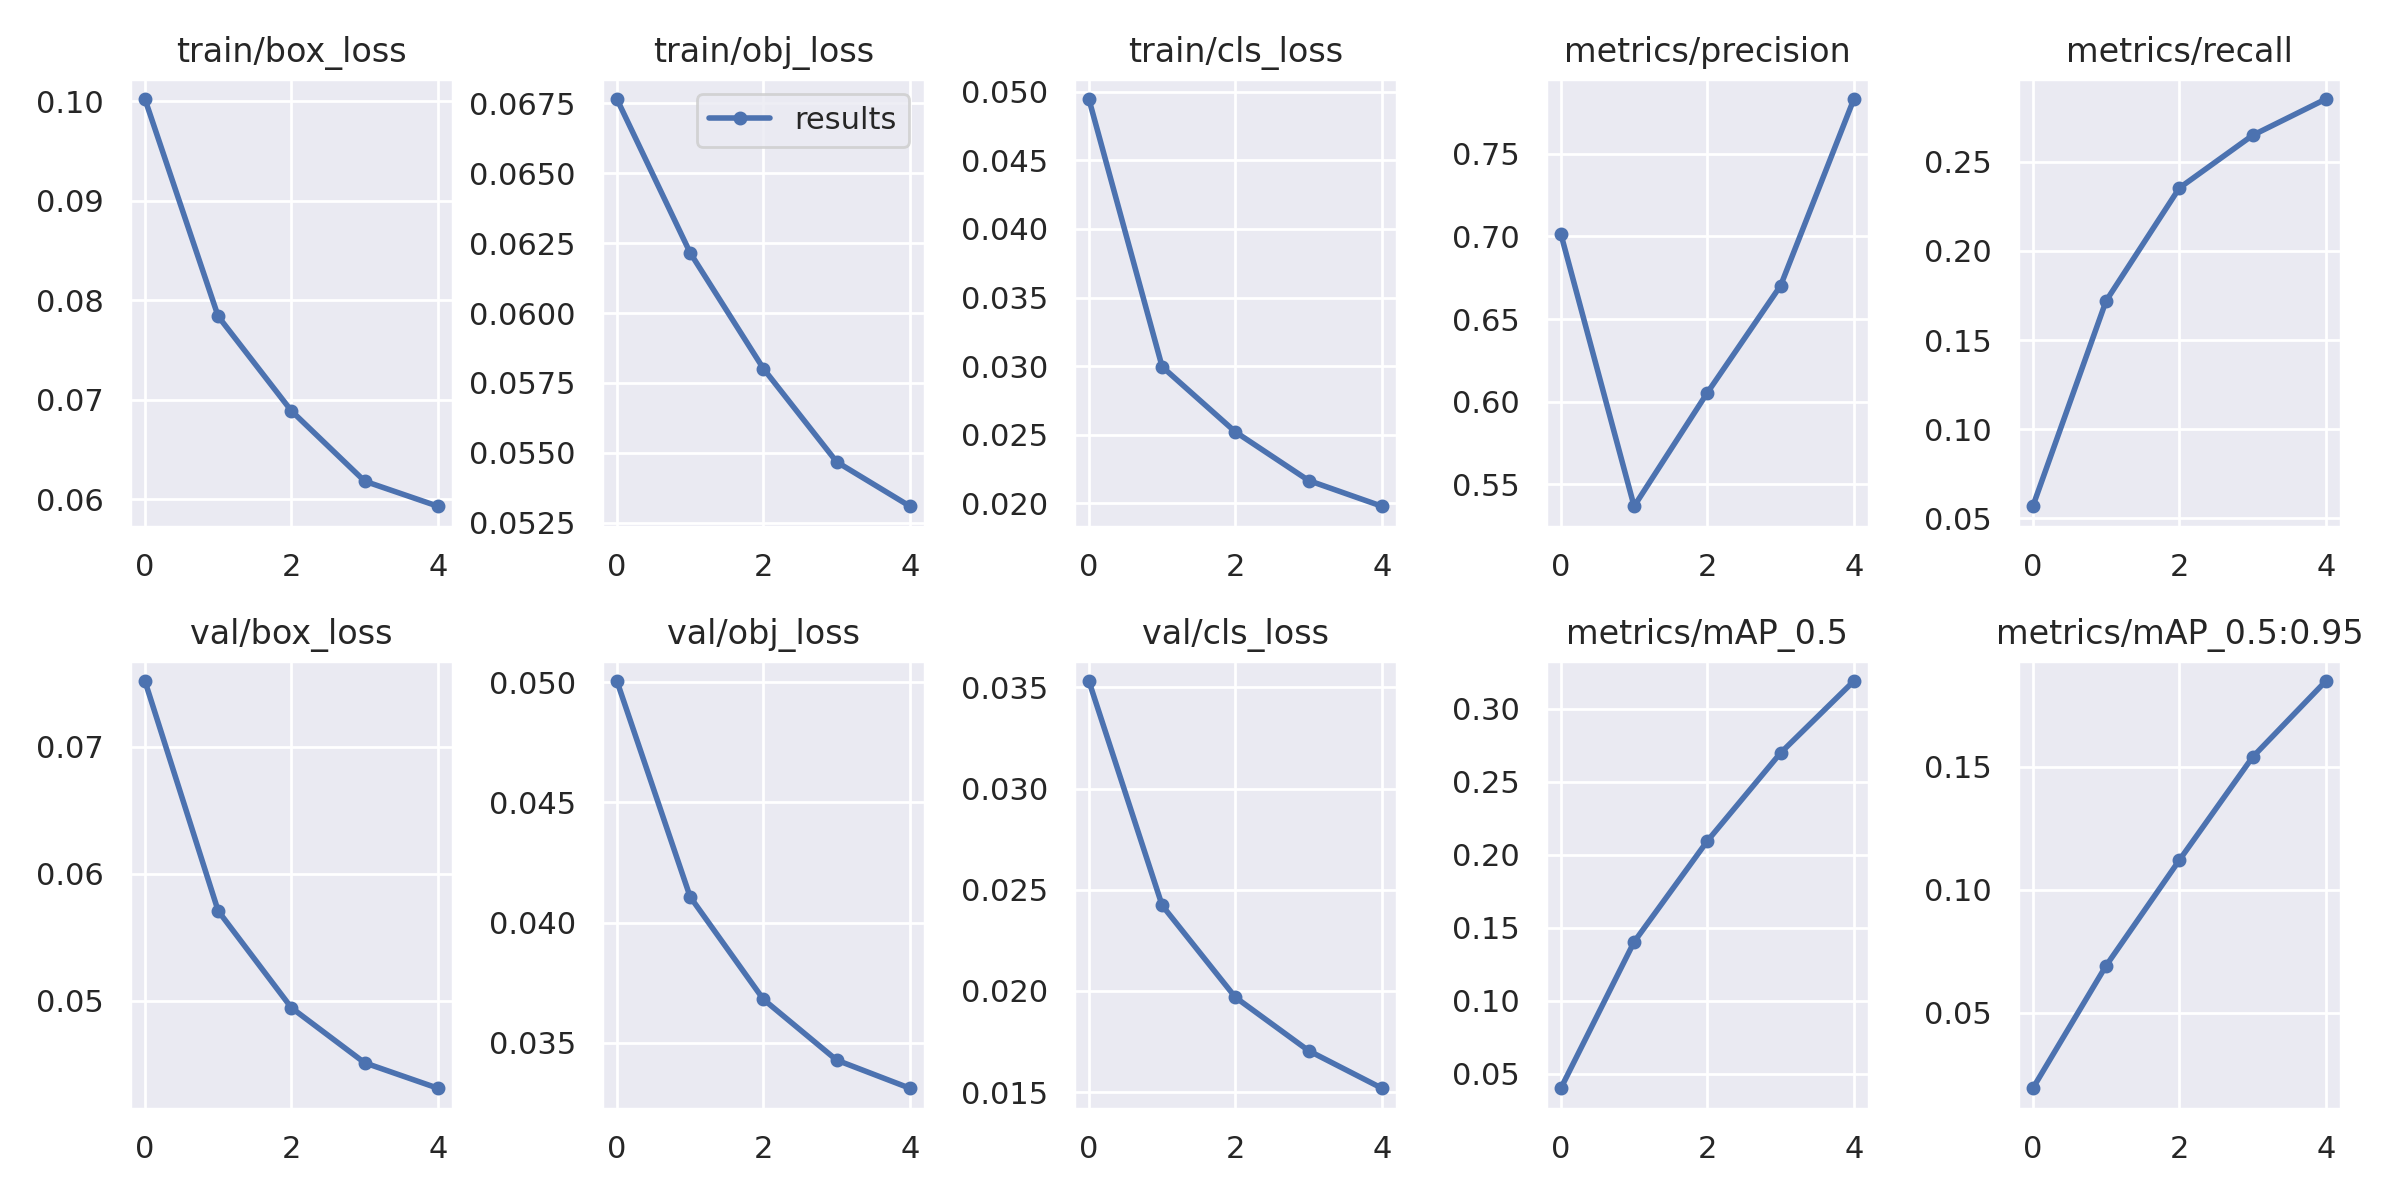

 

### 평가 지표

<img width="400" src= "https://user-images.githubusercontent.com/54880474/171032348-99af115a-3b0a-4635-be28-80f9c29d8007.png">

PR 곡선은 confidence 레벨에 대한 threshold 값의 변화에 의한 물체 검출기의 성능을 평가하는 방법입니다.  
confidence 레벨은 검출한 것에 대해 알고리즘이 얼마나 확신이 있는지를 알려주는 값입니다.  
물체 클래스가 여러 개인 경우 각 클래스당 AP를 구한 다음에 그것을 모두 합한 다음에 물체 클래스의 갯수로 나눠줌으로 알고리즘의 성능을 평가합니다.  
<img width="400" src= "https://user-images.githubusercontent.com/54880474/171032612-ad425a16-15d6-415f-8de5-fe42750debf9.png">

저희 모델에서는 mAP가 높은 Pre-Train 모델을 선정하였습니다.  


## Model Test

### Pre-Train 모델

* model = yolov5m
* image size = 640
* batch size = 32

In [ ]:
!python detect.py --source '/content/gdrive/MyDrive/DLP/시연영상.mp4' --weight '/content/gdrive/MyDrive/DLP/result/효준/train/exp/weights/best.pt'

detect: weights=['/content/gdrive/MyDrive/DLP/result/효준/train/exp/weights/best.pt'], source=/content/gdrive/MyDrive/DLP/시연영상.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-234-gd490bdd Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model summary: 290 layers, 20978205 parameters, 0 gradients, 48.3 GFLOPs
video 1/1 (1/557) /content/gdrive/.shortcut-targets-by-id/1tuDEf-stZClDnTJwrYx_rD8asx92xcnr/DLP/시연영상.mp4: 384x640 11 Vehicle_Cars, 3 Vehicle_Buss, 1 Vehicle_Unknown, 8 Pedestrian_Pedestrians, 3 TrafficLight_Reds, 3 RoadMark_Crosswalks, Done. (0.018s)
video 1/1 (2/557) /content/gd

### Not Pre-Train 모델

* model = yolov5m
* image size = 640
* batch size = 32

In [ ]:
!python detect.py --weight /content/gdrive/MyDrive/DLP/result/제우2/train/exp/weights/best.pt --source /content/gdrive/MyDrive/DLP/시연영상.mp4

detect: weights=['/content/gdrive/MyDrive/DLP/result/제우2/train/exp/weights/best.pt'], source=/content/gdrive/MyDrive/DLP/시연영상.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-236-gdcf8073 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
YOLOv5m summary: 290 layers, 20978205 parameters, 0 gradients, 48.3 GFLOPs
video 1/1 (1/557) /content/gdrive/MyDrive/DLP/시연영상.mp4: 384x640 8 Vehicle_Cars, 1 Vehicle_Bus, 1 Vehicle_Unknown, 3 Pedestrian_Pedestrians, 3 TrafficLight_Reds, 2 TrafficLight_Greens, 1 TrafficSign_Speed, 3 RoadMark_Crosswalks, Done. (0.017s)
video 1/1 (2/557) /content/gdrive/M

https://drive.google.com/file/d/1K3a2UiGeXy3hVyCWcg5MY1SgH4WftQJ1/view?usp=sharing

### Yolov5s VS Yolov5m

Yolov5s와 Yolov5m에 대한 비교를 진행해보았습니다.  
Reference Data인 Coco Dataset에서는 속도 측면에서는 S모델이, 정확도 부분에서는 M 모델이 뛰어나다고 알려져있습니다.  
프로젝트에서도 비슷한 결과를 보이는지 확인해보았습니다.  

![results](https://user-images.githubusercontent.com/54880474/171034600-00ed501d-9448-479c-9b1d-e292f6b46bb5.png)


In [ ]:
!python train.py --img 640 --cfg yolov5s.yaml  --batch 64 --epochs 10 --data /content/yolov5/data/custom_dataset.yaml --weights yolov5s.pt 


train: weights=yolov5s.pt, cfg=yolov5s.yaml, data=/content/yolov5/data/custom_dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=64, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-201-g9a7f289 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_g

In [ ]:
save_path = '/content/gdrive/MyDrive/DLP/result/건주'
save_file_path = '/content/yolov5/runs/train'

shutil.move(save_file_path, save_path)

'/content/gdrive/MyDrive/DLP/result/train'

In [ ]:
!python detect.py --weight /content/gdrive/MyDrive/DLP/result/건주/train/exp/weights/best.pt --source /content/gdrive/MyDrive/DLP/시연영상/시연영상.mp4

detect: weights=['/content/gdrive/MyDrive/DLP/result/건주/train/exp/weights/best.pt'], source=/content/gdrive/MyDrive/DLP/시연영상/시연영상.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-236-gdcf8073 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7096429 parameters, 0 gradients, 16.1 GFLOPs
video 1/1 (1/557) /content/gdrive/MyDrive/DLP/시연영상/시연영상.mp4: 384x640 9 Vehicle_Cars, 2 Vehicle_Buss, 1 Vehicle_Motorcycle, 1 Vehicle_Unknown, 10 Pedestrian_Pedestrians, 3 TrafficLight_Reds, 1 TrafficSign_Speed, 3 RoadMark_Crosswalks, Done. (0.011s)
video 1/1 (2/557) /conten

https://drive.google.com/file/d/1sMeSx5YaQtN5hYX0XyoxGBCllw_zSGlb/view?usp=sharing

# 최종 결과

Yolov5s와 Yolov5m 모델은 인식 속도에서 차이를 보였습니다.  
두 모델에서 모델이 측정한 Label 인식은 큰 차이가 없었으며 확률 값에서 차이가 있었습니다.  
또한 mAP가 높은 Pre-Train 모델을 선정하였습니다

따라서 최종 모델로는 Yolov5s 모델을 통해 640 image size, multi-gpu를 통한 140 batch size를 통해 진행하였습니다.  

![20220531_023219zzzzz](https://user-images.githubusercontent.com/54880474/171038911-d05dfe69-8fbf-4b62-b34d-0f43578c6327.png)

GCP에서 제공하는 Jupyter LAB 또한 일정 시간 이후 학습 진행 과정을 표현하지 못했지만 GPU를 통한 학습은 진행되었습니다.  

해당 모델에서는 다음과 같은 환경에서 진행하였습니다.  
![20220531_021151s](https://user-images.githubusercontent.com/54880474/171036785-d7c1e6a7-0f80-47ae-8fac-a30bc1329113.png)


## GCP 학습 코드  

GCP는 Project별 Cloud Storage를 통해 데이터를 저장할 수 있습니다.  

![20220531_023452aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa](https://user-images.githubusercontent.com/54880474/171039177-f66d7978-d17d-4c1e-9b2b-05164f613c29.png)

크기가 큰 데이터를 Cloud Storage를 통해 저장하고 Jupyter Lab에서 간단한 코드를 통해 불러올 수 있었습니다.  

![20220531_023715www](https://user-images.githubusercontent.com/54880474/171039468-2f38c7b0-5386-4da6-9c49-55ead3104977.png)

Jupyter Lab은 저희가 익숙한 Colab이나 Jupyter Notebook과 유사한 작업환경을 제공하였습니다.  

아래 코드는 GCP에서 작성한 코드이므로 colab 환경과 다를 수 있습니다.  

In [ ]:
# GPU 개수 확인
print(torch.cuda.device_count()) # 3

2


### GCP Storage 이용 및 파일 경로 수정

In [ ]:
from google.cloud import storage

In [ ]:
file_names = '/home/jupyter/bb.zip'
unzip(file_names,'custom_dataset/val/labels')

In [ ]:
shutil.move('custom_dataset/val/labels/bb/자동차전용도로',
            'custom_dataset/val/labels')

'custom_dataset/val/labels/자동차전용도로'

In [ ]:
shutil.move('custom_dataset/val/labels/bb/도심로',
            'custom_dataset/val/labels')

'custom_dataset/val/labels/도심로'

In [ ]:
shutil.rmtree('custom_dataset/val/labels/bb')

In [ ]:
file_names = '/home/jupyter/labels.zip'
unzip(file_names,'custom_dataset/train')

In [ ]:
shutil.move('custom_dataset/train/labels/labels',
            'custom_dataset/')

'custom_dataset/labels'

In [ ]:
import os
os.remove('/home/jupyter/bb.zip')

In [ ]:
os.remove('/home/jupyter/labels.zip')

In [ ]:
client = storage.Client()
print("Client created using default project: {}".format(client.project))

Client created using default project: focal-cooler-343812


In [ ]:
buckets = client.list_buckets()

print("Buckets in {}:".format(client.project))
for item in buckets:
    print("\t" + item.name)

Buckets in focal-cooler-343812:
	cloud-ai-platform-b401b12d-7135-4e40-822e-f76792602368


In [ ]:
bucket_name = 'cloud-ai-platform-b401b12d-7135-4e40-822e-f76792602368'

bucket = client.get_bucket(bucket_name)

print("Bucket name: {}".format(bucket.name))
print("Bucket location: {}".format(bucket.location))
print("Bucket storage class: {}".format(bucket.storage_class))

Bucket name: cloud-ai-platform-b401b12d-7135-4e40-822e-f76792602368
Bucket location: US-CENTRAL1
Bucket storage class: REGIONAL


In [ ]:
bucket_name = 'cloud-ai-platform-b401b12d-7135-4e40-822e-f76792602368'
dl_dir = '/home/jupyter/'
prefix = 'gs://cloud-ai-platform-b401b12d-7135-4e40-822e-f76792602368/'

storage_client = storage.Client()
bucket = storage_client.get_bucket(bucket_name)
print(bucket)
blobs = bucket.list_blobs()  # Get list of files
for blob in blobs:
    filename = blob.name.replace('/', '_') 
    blob.download_to_filename(dl_dir + filename)

<Bucket: cloud-ai-platform-b401b12d-7135-4e40-822e-f76792602368>


In [ ]:
file_names = '/home/jupyter/[원천]도심로.zip'
unzip(file_names,'custom_dataset/train/images')

In [ ]:
file_names = '/home/jupyter/[원천]자동차전용도로.zip'
unzip(file_names,'custom_dataset/train/images')

In [ ]:
file_names = '/home/jupyter/원천데이터-001.zip'
unzip(file_names,'custom_dataset/val/images')

In [ ]:
os.remove('/home/jupyter/[원천]도심로.zip')
os.remove('/home/jupyter/[원천]자동차전용도로.zip')
os.remove('/home/jupyter/원천데이터-001.zip')

In [ ]:
shutil.move('custom_dataset/val/images/bb',
            'custom_dataset/')

'custom_dataset/bb'

In [ ]:
shutil.rmtree('custom_dataset/val/images')

In [ ]:
shutil.move('custom_dataset/bb',
            'custom_dataset/val/images')

'custom_dataset/val/images'

### GCP를 이용한 모델 학습

In [ ]:
import yaml

make_yaml = {
             "train" : "/home/jupyter/yolov5/custom_dataset/train",
            "val": "/home/jupyter/yolov5/custom_dataset/val",

             "nc" : 32,
             "names": ['Vehicle_Car', 'Vehicle_Bus', 'Vehicle_Motorcycle', 'Vehicle_Unknown', 
                       'Pedestrian_Pedestrian', 'Pedestrian_Bicycle', 'Lane_White_Dash', 'Lane_White_Solid', 
                       'Lane_Yellow_Dash', 'Lane_Yellow_Solid', 'Lane_Blue_Dash', 'Lane_Blue_Solid', 
                       'TrafficLight_Red', 'TrafficLight_Yellow', 'TrafficLight_Green', 'TrafficLight_Arrow', 
                       'TrafficLight_RedArrow', 'TrafficLight_YellowArrow', 'TrafficLight_GreenArrow', 
                       'TrafficSign_Speed', 'TrafficSign_Else', 'RoadMark_StopLine', 'RoadMark_Crosswalk', 
                       'RoadMark_Number', 'RoadMark_Character', 'RoadMarkArrow_Straight', 'RoadMarkArrow_Left', 
                       'RoadMarkArrow_Right', 'RoadMarkArrow_StraightLeft', 'RoadMarkArrow_StraightRight', 
                       'RoadMarkArrow_Uturn', 'RoadMarkArrow_Else']
}
with open('data/custom_dataset.yaml', 'w') as outfile:
    yaml.dump(make_yaml, outfile, default_flow_style=False)

In [ ]:
for (root, directories, files) in os.walk('/home/jupyter/yolov5/custom_dataset'):
    for file in files:
        file_path = os.path.join(root, file)
        change_file_path = file.replace('_v001_1','')
        file_path2 = os.path.join(root, change_file_path)
        os.rename(file_path,file_path2)

In [ ]:
for (root, directories, files) in os.walk('/home/jupyter/yolov5/custom_dataset'):
    for file in directories:
        file_path = os.path.join(root, file)
        if 'annotations' in file_path:
            change_file_path = file_path.replace('_annotations_v001_1','')
          
            shutil.move(file_path,change_file_path)

In [ ]:
!python -m torch.distributed.run --nproc_per_node 2 train.py --device 0,1 --img 640 --batch 140 --epochs 30 --data data/custom_dataset.yaml --weights yolov5s.pt

*****************************************
Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed. 
*****************************************
train: weights=yolov5s.pt, cfg=, data=data/custom_dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=140, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0,1, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 1 commit. Use `git pull` or `git clone https://github.com/ultralytics/yolo

In [ ]:
# GCP 결과 저장

import zipfile

file_path = '/home/jupyter/yolov5/runs/train'

zip_file = zipfile.ZipFile(file_path + "/output.zip", "w")
for (path, dir, files) in os.walk(file_path):
    for file in files:
        zip_file.write(os.path.join(path, file), compress_type=zipfile.ZIP_DEFLATED)

zip_file.close()

### GCP 모델 결과 확인

Confusion Matrix를 확인한 결과 전체적으로 더 정확한 데이터를 얻는 label의 개수가 많아졌습니다.  

<img width="400" src = "https://user-images.githubusercontent.com/54880474/171061329-77a9970e-0ea9-4f22-9cb6-fbd59fa89323.png">

<img width="400" src = "https://user-images.githubusercontent.com/54880474/171061329-77a9970e-0ea9-4f22-9cb6-fbd59fa89323.png">

  

PR 커브의 경우도 더 넓은 범위를 보이는 것을 확인하였습니다.  

<img width="400" src = "https://user-images.githubusercontent.com/54880474/171061792-edbddfa9-c478-4e2a-8632-b4563a3f9907.png">

<img width="400" src = "https://user-images.githubusercontent.com/54880474/171061781-22e0d545-b05e-4be4-8640-098074f4f318.png">

전체적인 지표 또한 나아진 모습을 보였으며 Precision 또한 불규칙한 변화를 보였지만 0.7 주변으로 점차 수렴하는 모습을 보였습니다.  

![results](https://user-images.githubusercontent.com/54880474/171062002-53ab083f-c7c7-4223-a8a8-78a9463badb1.png)













## 시연 영상  

https://youtu.be/wYhSR6Wjy0Q 

In [ ]:
!python detect.py --weight /content/gdrive/MyDrive/DLP/result/건주/gcp_result/train/exp16/weights/best.pt --source /content/gdrive/MyDrive/DLP/시연영상/시연영상.mp4

detect: weights=['/content/gdrive/MyDrive/DLP/result/건주/gcp_result/train/exp16/weights/best.pt'], source=/content/gdrive/MyDrive/DLP/시연영상/시연영상.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-236-gdcf8073 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model summary: 213 layers, 7096429 parameters, 0 gradients, 16.1 GFLOPs
video 1/1 (1/557) /content/gdrive/MyDrive/DLP/시연영상/시연영상.mp4: 384x640 11 Vehicle_Cars, 2 Vehicle_Buss, 1 Vehicle_Motorcycle, 1 Vehicle_Unknown, 12 Pedestrian_Pedestrians, 4 TrafficLight_Reds, 2 RoadMark_Crosswalks, Done. (0.011s)
video 1/1 (2/557) /content/gdrive/

### 결론

Yolov5s 모델로 데이터가 충분하다면 어느 정도 정확한 실시간 객체 탐지가 가능하였습니다.  

모델의 confidence와 정확도는 더 복잡한 yolov5 모델을 통해 올릴 수 있으며 상황에 따라 적절한 모델을 선택하는 것이 적합하다는 결론을 얻었습니다.  

하지만 카메라를 통한 분석은 물체와의 거리를 측정하지 못하는 문제가 있으며 GPU에 따라 같은 모델을 사용하더라도 객체 탐지 속도가 달라 타 센서를 통해 보완이 필요하다고 생각합니다.  

# 한계점 및 보완점  

전체 데이터셋에서 Label 분포는 다음과 같습니다.  
<img width="400" src = "https://user-images.githubusercontent.com/54880474/171037068-a6c94ad3-87d7-4460-afb3-b0d2c9ed9471.jpg">

저희가 사용한 데이터셋의 분포는 다음과 같습니다.  

<img width="400" src = "https://user-images.githubusercontent.com/54880474/171037306-ed531b1c-4231-4a23-bac9-6ee4cc1fdff7.jpg">  

<img width="400" src = "https://user-images.githubusercontent.com/54880474/171036988-ea99eecf-cf14-4a1e-adfb-7a0fb9ea05fa.png">  

<img width="400" src = "https://user-images.githubusercontent.com/54880474/171061226-d8e3be15-9832-455d-a6d3-dea9baa7c763.png">  


적절한 Epoch와 Batch Size를 찾기 위해 다양한 시도를 해보았지만 GCP 초기 할당 금액을 초과와 학습 시간 예상 불가로 초기 계획했던 yolov5x 모델이나 1280 image size의 학습을 도중에 포기하였습니다.   

![20220531_022225qq](https://user-images.githubusercontent.com/54880474/171038103-01c54907-4b29-42ed-b644-406a17bd5a89.png)

![20220531_0223261111111](https://user-images.githubusercontent.com/54880474/171038105-2fffe615-2378-4adf-be09-0996cc6b384b.png)

학습시간이 매우 오래 걸렸으며 Label 중 자동차에 대한 분포가 마찬가지로 매우 큰 분포를 보였습니다.  

저희가 사용한 도심로 데이터는 자동차 전용 도로에 비해 Traffic Arrow와 같이 자동차 전용도로에서 많이 볼 수 있는 데이터 셋이 적었습니다.  

만약 더 큰 저장 공간을 사용하며 학습 시간을 충분히 가졌다면 적은 label에 대한 정확도 또한 더 높아졌을 것이라고 생각합니다.  





# 디버깅 및 Git  

최종 모델 선정 후 GCP를 이용하여 학습을 계획하였습니다.  

초기 GCP 환경 설정  

![Untitled](https://user-images.githubusercontent.com/54880474/171035994-d51d0a51-9ead-4811-8ae9-98a2baa86501.png)

Yolov5 모델 Git clone

![Untitled (1)](https://user-images.githubusercontent.com/54880474/171035964-70fcf243-1fca-4a0c-8260-b2abecb908e4.png)  

Jupyter Notebook 설정

![Untitled (3)](https://user-images.githubusercontent.com/54880474/171036178-6630ca41-5857-41d4-aa13-2ec5755dd317.png)  

오류 발생

![Untitled (4)](https://user-images.githubusercontent.com/54880474/171036349-e461f268-b81d-4b3b-95b2-753160e3a043.png)

리눅스 환경 update 시도

![Untitled (5)](https://user-images.githubusercontent.com/54880474/171036397-70a5da4c-7bd4-42b2-b89e-218a373a127b.png)

운영체제 변경 후 주피터 랩 시도

Durbian -> Ubuntu 20.04

![20220531_020958](https://user-images.githubusercontent.com/54880474/171036543-756eb6a8-974f-4bb6-a5db-f13352fa46e9.png)

![20220531_023715www](https://user-images.githubusercontent.com/54880474/171039468-2f38c7b0-5386-4da6-9c49-55ead3104977.png)

최종 환경 세팅

![20220531_021151s](https://user-images.githubusercontent.com/54880474/171036785-d7c1e6a7-0f80-47ae-8fac-a30bc1329113.png)


저희는 Git과 Google Cloud를 통해 모델 코드와 결과값을 저장하고 공유하였습니다.  

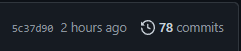

해당 발표 자료 외 결과 및 코드는 Github 링크를 통해 확인할 수 있습니다.  

https://github.com/keonju2/2022_DL_project.git



# Reference

Comparison of YOLOv3, YOLOv5s and MobileNet-SSD V2 for Real-Time
Mask Detection (Rakkshab Varadharajan Iyer, 2021)  
자율주행 차량 영상 기반 객체 인식 인공지능 기술 현황 (임헌국, 2021)  
자율주행을 위한 딥러닝 기반 영상처리 (유혜빈, 2019)